<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/7_Sector_Fiscal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # https://colab.research.google.com/notebooks/snippets/gcs.ipynb
# from google.colab import auth
# auth.authenticate_user()

# project_id = 'ufm-market-trends'
# !gcloud config set project {project_id}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pyxlsb
!pip install fpdf
import datetime
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")
import requests
!pip install xmltodict
import xmltodict
from dateutil.relativedelta import *
!pip install --upgrade --force-reinstall xlrd

  Using cached pyxlsb-1.0.10-py2.py3-none-any.whl (23 kB)
  Using cached fpdf-1.7.2-py2.py3-none-any.whl
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-hrr6pnb3
  Running command git clone --filter=blob:none --quiet https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-hrr6pnb3
  Resolved https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to commit bc267875f263adc24695f4afc8df549f6678ee0b
  Preparing metadata (setup.py) ... done
  Created wheel for ufmtrends-sdk: filename=ufmtrends_sdk-0.1.1-py3-none-any.whl size=13005 sha256=01555c2caf9ce2db0691b2e5da57fa2c7d9b3f3e59c90a35a84256477f81e260
  Stored in directory: /tmp/pip-ephem-wheel-cache-8zlujbgv/wheels/d8/63/72/fd94fcb7285b31cd0125721e8d1340b8842b4efc3b6d212027
Successfully built ufmtrends-sdk
  Using cached xmltodict-0.13.0-py2.py3-none-any.whl (10.0 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [2]:
# "Gobierno central ingresos - mensuales - totales"
revenue_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm60.xls"
revenue_dataframe = pd.read_excel(revenue_url, sheet_name=0)
revenue_dataframe

,Unnamed: 0,GUATEMALA:,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,GOBIERNO CENTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,INGRESOS TOTALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,AÑOS 1995-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-Millones de Quetzales-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.000000,2002.000000,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021*,2022*
5,NaN,ENERO,505.0,681.8,838.5,862.6,1091.3,1294.3,1399.300000,1966.800000,...,4640.707388,4935.736931,4998.974750,5339.699198,5511.382579,5992.359871,6276.883582,6920.074181,7220.492501,8131.608629
6,NaN,FEBRERO,486.9,589.6,724.8,897.2,1038.5,971.3,1048.900000,1198.200000,...,3208.333034,3315.536308,3570.370375,3601.565471,3891.502159,4068.393426,4199.801804,4577.291281,5046.226187,5568.957917
7,NaN,MARZO,572.4,486.9,717.8,825.0,1015.3,1040.0,1122.900000,1215.100000,...,4344.980194,4370.110263,4546.912673,4517.047287,5252.060851,5156.617043,5491.207586,4014.296854,6651.993935,8113.296571
8,NaN,ABRIL,539.7,817.4,927.2,1193.0,1395.5,984.4,1757.800000,2193.900000,...,5043.218919,5331.492530,5370.795853,5562.893435,5980.796598,6308.782223,6507.436056,7231.773065,8128.065014,9604.081427
9,NaN,MAYO,878.2,790.1,1018.5,1338.1,1191.5,1941.0,1599.900000,1907.400000,...,3743.666468,3796.326404,3749.001309,4760.448176,4176.712616,4596.674517,4967.846854,3757.559883,5419.094789,6544.043906


In [3]:
revenue_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
revenue_skip_footer = 3 # Ignorar 2 líneas del pie de página (int parameter)

revenue_dataframe = pd.read_excel(revenue_url, sheet_name=0,
                                  skiprows=revenue_skip_rows,
                                  skipfooter=revenue_skip_footer)
revenue_dataframe

,Unnamed: 0,Unnamed: 1,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021*,2022*
0,NaN,ENERO,505.0,681.8,838.5,862.6,1091.3,1294.3,1399.300000,1966.800000,...,4640.707388,4935.736931,4998.974750,5339.699198,5511.382579,5992.359871,6276.883582,6920.074181,7220.492501,8131.608629
1,NaN,FEBRERO,486.9,589.6,724.8,897.2,1038.5,971.3,1048.900000,1198.200000,...,3208.333034,3315.536308,3570.370375,3601.565471,3891.502159,4068.393426,4199.801804,4577.291281,5046.226187,5568.957917
2,NaN,MARZO,572.4,486.9,717.8,825.0,1015.3,1040.0,1122.900000,1215.100000,...,4344.980194,4370.110263,4546.912673,4517.047287,5252.060851,5156.617043,5491.207586,4014.296854,6651.993935,8113.296571
3,NaN,ABRIL,539.7,817.4,927.2,1193.0,1395.5,984.4,1757.800000,2193.900000,...,5043.218919,5331.492530,5370.795853,5562.893435,5980.796598,6308.782223,6507.436056,7231.773065,8128.065014,9604.081427
4,NaN,MAYO,878.2,790.1,1018.5,1338.1,1191.5,1941.0,1599.900000,1907.400000,...,3743.666468,3796.326404,3749.001309,4760.448176,4176.712616,4596.674517,4967.846854,3757.559883,5419.094789,6544.043906
5,NaN,JUNIO,499.2,697.8,824.3,807.8,941.4,1006.9,1125.100000,1299.200000,...,3237.792363,3717.243519,3859.195419,4073.804817,4880.548816,4545.167247,4550.223705,3862.856507,5676.776443,6692.862712
6,NaN,JULIO,608.9,858.6,884.8,1153.8,1277.0,1598.2,1824.700000,2256.200000,...,5470.887561,5950.802931,5988.671936,6505.046671,6499.138208,6931.278064,7344.158405,6395.612083,9226.957360,10664.096724
7,NaN,AGOSTO,554.9,653.9,542.9,840.6,1147.7,1067.4,1335.700000,1450.000000,...,3504.804589,3808.896506,3786.850002,4392.216321,4305.447567,4475.191466,4785.620727,4266.815146,5654.854775,6649.186137
8,NaN,SEPTIEMBRE,451.0,619.7,634.9,741.1,896.1,1007.1,1331.600000,1380.300000,...,3476.810005,3758.947687,3657.752424,3909.351832,4059.007777,4194.746606,4568.152081,4538.183301,5599.741605,6591.844687
9,NaN,OCTUBRE,691.3,801.6,723.1,1097.1,1139.4,1770.0,2196.200000,2556.600000,...,5368.188643,5413.838075,5473.091055,5920.319469,6311.864981,6731.967348,7490.800125,7903.847929,9497.879057,10413.758292


In [4]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/23410083/pandas-multiple-columns-into-one-column
# https://stackoverflow.com/questions/23410083/pandas-multiple-columns-into-one-column/48785561#48785561
# https://www.w3resource.com/pandas/dataframe/dataframe-stack.php (muy bueno)

revenue_dataframe = revenue_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
revenue_dataframe = revenue_dataframe.drop(month_rows).reset_index(drop=True)
revenue_dataframe.columns = ['year', 'month', 'total_revenue'] 
revenue_dataframe.head(15)

,year,month,total_revenue
0,1995,0,505.0
1,1995,1,486.9
2,1995,2,572.4
3,1995,3,539.7
4,1995,4,878.2
5,1995,5,499.2
6,1995,6,608.9
7,1995,7,554.9
8,1995,8,451.0
9,1995,9,691.3


In [5]:
# Recurso opcional de referencia: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
# https://www.educative.io/edpresso/how-to-delete-a-column-in-pandas
start_year = 1995 # Año 1995

start_date = datetime.datetime(year=start_year, 
                               month=1, 
                               day=1) # Fecha 1995-1-1

months_since_then = len(revenue_dataframe["month"]) # trimestres hasta el presente
months = pd.period_range(start_date, periods=months_since_then,freq='M')

# https://stackoverflow.com/questions/53898482/clean-way-to-convert-quarterly-periods-to-datetime-in-pandas
dates = pd.PeriodIndex(months, freq='M').to_timestamp()

# date es un tipo que se presta bien a las gráficas de matplotlib 
revenue_dataframe.insert(loc=0, column="date", value=dates, allow_duplicates=True)

#  Puede ser útil (y verse bien) el formato e.g., 1995-01 al escribir en Excel
revenue_dataframe["month"] = months 

del revenue_dataframe["year"] # no la necesitamos más
revenue_dataframe

,date,month,total_revenue
0,1995-01-01,1995-01,505.0
1,1995-02-01,1995-02,486.9
2,1995-03-01,1995-03,572.4
3,1995-04-01,1995-04,539.7
4,1995-05-01,1995-05,878.2
...,...,...,...
331,2022-08-01,2022-08,6649.186137
332,2022-09-01,2022-09,6591.844687
333,2022-10-01,2022-10,10413.758292
334,2022-11-01,2022-11,6785.521572


In [6]:
spending_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm65.xls"

spending_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
spending_skip_footer = 3 # Ignorar 2 líneas del pie de página (int parameter)

spending_dataframe = pd.read_excel(spending_url, sheet_name=0,
                                  skiprows=spending_skip_rows,
                                  skipfooter=spending_skip_footer)
spending_dataframe

spending_dataframe = spending_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
spending_dataframe = spending_dataframe.drop(month_rows).reset_index(drop=True)
spending_dataframe.columns = ['year', 'month', 'total_spending'] 
spending_dataframe
fiscal_dataframe = revenue_dataframe.join(spending_dataframe['total_spending'])
fiscal_dataframe

,date,month,total_revenue,total_spending
0,1995-01-01,1995-01,505.0,401.0
1,1995-02-01,1995-02,486.9,349.6
2,1995-03-01,1995-03,572.4,627.9
3,1995-04-01,1995-04,539.7,435.0
4,1995-05-01,1995-05,878.2,659.9
...,...,...,...,...
331,2022-08-01,2022-08,6649.186137,8462.83404
332,2022-09-01,2022-09,6591.844687,8641.270004
333,2022-10-01,2022-10,10413.758292,9455.376516
334,2022-11-01,2022-11,6785.521572,9952.528418


In [7]:
internal_debt_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm54.xls"

internal_debt_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
internal_debt_skip_footer = 20 # Ignorar 20 líneas del pie de página (int parameter)

internal_debt_dataframe = pd.read_excel(internal_debt_url, sheet_name=0,
                                  skiprows=internal_debt_skip_rows,
                                  skipfooter=internal_debt_skip_footer)
internal_debt_dataframe

internal_debt_dataframe = internal_debt_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
internal_debt_dataframe = internal_debt_dataframe.drop(month_rows).reset_index(drop=True)
TOTAL_INTERNAL_DEBT = "Deuda interna total"
internal_debt_dataframe.columns = ['year', 'month', TOTAL_INTERNAL_DEBT] 
internal_debt_dataframe
fiscal_dataframe = fiscal_dataframe.join(internal_debt_dataframe[TOTAL_INTERNAL_DEBT])
fiscal_dataframe

,date,month,total_revenue,total_spending,Deuda interna total
0,1995-01-01,1995-01,505.0,401.0,4400.4
1,1995-02-01,1995-02,486.9,349.6,4551.0
2,1995-03-01,1995-03,572.4,627.9,4686.5
3,1995-04-01,1995-04,539.7,435.0,4697.6
4,1995-05-01,1995-05,878.2,659.9,4527.0
...,...,...,...,...,...
331,2022-08-01,2022-08,6649.186137,8462.83404,127427.385306
332,2022-09-01,2022-09,6591.844687,8641.270004,127600.398935
333,2022-10-01,2022-10,10413.758292,9455.376516,127603.366993
334,2022-11-01,2022-11,6785.521572,9952.528418,127636.960359


In [8]:
external_debt_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm50.xls"

external_debt_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
external_debt_skip_footer = 15 # Ignorar 20 líneas del pie de página (int parameter)

external_debt_dataframe = pd.read_excel(external_debt_url, sheet_name=0,
                                  skiprows=external_debt_skip_rows,
                                  skipfooter=external_debt_skip_footer)
external_debt_dataframe

external_debt_dataframe = external_debt_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
external_debt_dataframe = external_debt_dataframe.drop(month_rows).reset_index(drop=True)
TOTAL_EXTERNAL_DEBT = 'Deuda externa total (USD)'
external_debt_dataframe.columns = ['year', 'month', TOTAL_EXTERNAL_DEBT] 
external_debt_dataframe
fiscal_dataframe = fiscal_dataframe.join(external_debt_dataframe[TOTAL_EXTERNAL_DEBT])
fiscal_dataframe

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD)
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8
...,...,...,...,...,...,...
331,2022-08-01,2022-08,6649.186137,8462.83404,127427.385306,11181.5017
332,2022-09-01,2022-09,6591.844687,8641.270004,127600.398935,11152.7687
333,2022-10-01,2022-10,10413.758292,9455.376516,127603.366993,11093.9434
334,2022-11-01,2022-11,6785.521572,9952.528418,127636.960359,11089.0589


In [9]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/18175489/sending-soap-request-using-python-requests
# https://www.banguat.gob.gt/variables/ws/TipoCambio.asmx?op=TipoCambioDia
# https://stackoverflow.com/questions/45250626/how-to-parse-soap-xml-with-python

#import requests # libería necesaria (importada en la primera celda del notebook)
# from xml.etree import ElementTree # (también necesitas esta)


exchange_rate_url = "http://www.banguat.gob.gt/variables/ws/TipoCambio.asmx"
headers = {'content-type': 'application/soap+xml; charset=utf-',
           'content-length': '250'}

'''
El string a continuación debe estar 100% escrito correctamente.
El servidor SOAP se quejará si hay un espacio antes del primer nodo XML, 
incluso...
'''
body = """<?xml version="1.0" encoding="utf-8"?>
<soap12:Envelope xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:soap12="http://www.w3.org/2003/05/soap-envelope">
  <soap12:Body>
    <TipoCambioDia xmlns="http://www.banguat.gob.gt/variables/ws/" />
  </soap12:Body>
</soap12:Envelope>
"""

response = requests.post(exchange_rate_url,data=body,headers=headers)
print('Response content')
print(response.content)

print('\nParsed content')

# # !pip install xmltodict
# import xmltodict

stack_d = xmltodict.parse(response.content)
print(stack_d['soap:Envelope']['soap:Body']
      ['TipoCambioDiaResponse']['TipoCambioDiaResult'])

print('\nTipo de cambio de referencia')
print(stack_d['soap:Envelope']['soap:Body']
      ['TipoCambioDiaResponse']['TipoCambioDiaResult']['CambioDolar']
      ['VarDolar']['referencia'])

Response content
b'<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><TipoCambioDiaResponse xmlns="http://www.banguat.gob.gt/variables/ws/"><TipoCambioDiaResult><CambioDolar><VarDolar><fecha>15/02/2023</fecha><referencia>7.8313</referencia></VarDolar></CambioDolar><TotalItems>1</TotalItems></TipoCambioDiaResult></TipoCambioDiaResponse></soap:Body></soap:Envelope>'

Parsed content
{'CambioDolar': {'VarDolar': {'fecha': '15/02/2023', 'referencia': '7.8313'}}, 'TotalItems': '1'}

Tipo de cambio de referencia
7.8313


In [10]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/18175489/sending-soap-request-using-python-requests
# https://www.banguat.gob.gt/variables/ws/TipoCambio.asmx?op=TipoCambioDia
# https://stackoverflow.com/questions/45250626/how-to-parse-soap-xml-with-python

#import requests # libería necesaria (importada en la primera celda del notebook)
# from xml.etree import ElementTree # (también necesitas esta)


exchange_rate_url = "http://www.banguat.gob.gt/variables/ws/TipoCambio.asmx"
headers = {'content-type': 'application/soap+xml; charset=utf-',
           'content-length': '10'}

'''
El string a continuación debe estar 100% escrito correctamente.
El servidor SOAP se quejará si hay un espacio antes del primer nodo XML, 
incluso...
'''
body = """<?xml version="1.0" encoding="utf-8"?>
<soap12:Envelope xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:soap12="http://www.w3.org/2003/05/soap-envelope">
  <soap12:Body>
    <TipoCambioFechaInicial xmlns="http://www.banguat.gob.gt/variables/ws/">
      <fechainit>1/1/1995</fechainit>
    </TipoCambioFechaInicial>
  </soap12:Body>
</soap12:Envelope>
"""

response = requests.post(exchange_rate_url,data=body,headers=headers)
print('Response content')
print(response.content)

print('\nParsed content')

exchange_rates_soap = (xmltodict.parse(response.content)['soap:Envelope']
                       ['soap:Body']['TipoCambioFechaInicialResponse']
                       ['TipoCambioFechaInicialResult']['Vars']['Var'])
print(exchange_rates_soap)


print("\nImprimir primeras 10 fechas a modo de ejemplo")
for i in range(10):
  element = exchange_rates_soap[i]
  print(f"***{element['fecha']} -- {element['moneda']}")
  print(f"    compra: {element['compra']} - venta: {element['venta']}")


Response content
b'<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><TipoCambioFechaInicialResponse xmlns="http://www.banguat.gob.gt/variables/ws/"><TipoCambioFechaInicialResult><Vars><Var><moneda>2</moneda><fecha>01/01/1995</fecha><venta>5.64911</venta><compra>5.62518</compra></Var><Var><moneda>2</moneda><fecha>02/01/1995</fecha><venta>5.64911</venta><compra>5.62518</compra></Var><Var><moneda>2</moneda><fecha>03/01/1995</fecha><venta>5.66524</venta><compra>5.63181</compra></Var><Var><moneda>2</moneda><fecha>04/01/1995</fecha><venta>5.66524</venta><compra>5.63181</compra></Var><Var><moneda>2</moneda><fecha>05/01/1995</fecha><venta>5.67668</venta><compra>5.65213</compra></Var><Var><moneda>2</moneda><fecha>06/01/1995</fecha><venta>5.70438</venta><compra>5.67554</compra></Var><Var><moneda>2</moneda><fecha>07/01/1995</fecha><

In [11]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/44365209/generate-a-pandas-dataframe-from-ordereddict
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
# https://strftime.org/

CURRENCY = 'currency'
DATE = 'date'
SELL = 'sell'
BUY = 'buy'

exchange_rate_dataframe = pd.DataFrame(exchange_rates_soap, 
                                       columns=['moneda', 'fecha', 
                                                'venta', 'compra']
)

exchange_rate_dataframe.columns = [CURRENCY, DATE, SELL, BUY]
exchange_rate_dataframe[CURRENCY] = 'USD'

exchange_rate_dataframe[DATE] = pd.to_datetime(exchange_rate_dataframe[DATE], 
                                               format='%d/%m/%Y')
REFERENCE = 'reference_exchange_rate'
# https://www.banguat.gob.gt/cambio/cambio.pdf
exchange_rate_dataframe[REFERENCE] = (
    (pd.to_numeric(exchange_rate_dataframe[BUY]) 
    + pd.to_numeric(exchange_rate_dataframe[SELL])
    ) / 2)

exchange_rate_dataframe.head(-5)

,currency,date,sell,buy,reference_exchange_rate
0,USD,1995-01-01,5.64911,5.62518,5.637145
1,USD,1995-01-02,5.64911,5.62518,5.637145
2,USD,1995-01-03,5.66524,5.63181,5.648525
3,USD,1995-01-04,5.66524,5.63181,5.648525
4,USD,1995-01-05,5.67668,5.65213,5.664405
...,...,...,...,...,...
10258,USD,2023-02-06,7.84306,7.84306,7.843060
10259,USD,2023-02-07,7.84298,7.84298,7.842980
10260,USD,2023-02-08,7.84282,7.84282,7.842820
10261,USD,2023-02-09,7.84208,7.84208,7.842080


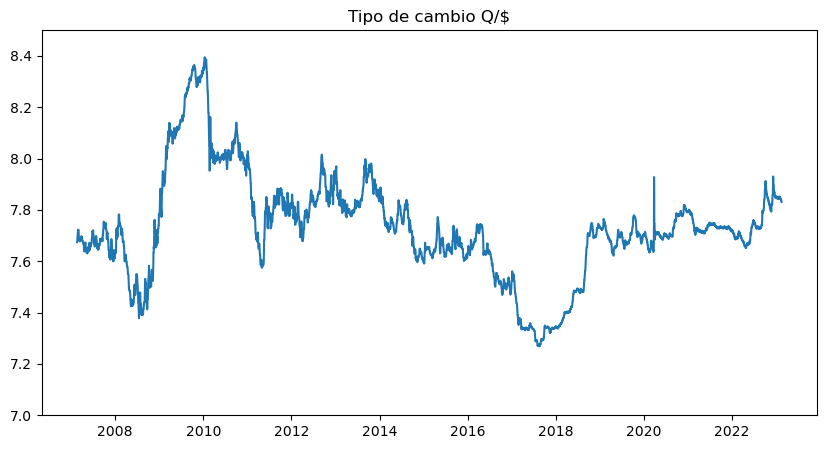

In [12]:
# Esta celda está para propositos de visualización y escribir más facilmente
# esta gráfica en Excel.
days_back_exchange_rate = -365 * 16

exchange_rate_data = {
    'labels': exchange_rate_dataframe['date'].dt.strftime('%Y-%m')[days_back_exchange_rate:],
    'dates': exchange_rate_dataframe['date'][days_back_exchange_rate:],
    'Tipo de cambio histórico': list(exchange_rate_dataframe[REFERENCE][days_back_exchange_rate:])
}

plt.figure(figsize=(10,5))
plt.plot(exchange_rate_data['dates'],
         exchange_rate_data['Tipo de cambio histórico'])
plt.ylim(7, 8.5)
plt.title("Tipo de cambio Q/$")
plt.show()

In [13]:
pd.DataFrame(exchange_rate_data)

,labels,dates,Tipo de cambio histórico
4428,2007-02,2007-02-20,7.67431
4429,2007-02,2007-02-21,7.67576
4430,2007-02,2007-02-22,7.68404
4431,2007-02,2007-02-23,7.69616
4432,2007-02,2007-02-24,7.69616
...,...,...,...
10263,2023-02,2023-02-11,7.83792
10264,2023-02,2023-02-12,7.83792
10265,2023-02,2023-02-13,7.83567
10266,2023-02,2023-02-14,7.83256


In [14]:
historical_rates_csv = "Tipo-Cambio-Historico.csv"
pd.DataFrame(exchange_rate_data).to_csv(historical_rates_csv, index=False)

In [15]:
bucket_path = 'ufm-market-trends/guatemala/tipo-de-cambio-historico'
csv_file = historical_rates_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Tipo-Cambio-Historico.csv [Content-Type=text/csv]...
/ [1 files][153.4 KiB/153.4 KiB]                                                
Operation completed over 1 objects/153.4 KiB.                                    
Copying gs://ufm-market-trends/guatemala/tipo-de-cambio-historico/Tipo-Cambio-Historico.csv [Content-Type=text/csv]...
/ [1 files][153.4 KiB/153.4 KiB]                                                
Operation completed over 1 objects/153.4 KiB.                                    
labels,dates,Tipo de cambio histórico
2007-02,2007-02-20,7.67431
2007-02,2007-02-21,7.67576
2007-02,2007-02-22,7.68404
2007-02,2007-02-23,7.69616
2007-02,2007-02-24,7.69616
2007-02,2007-02-25,7.69616
2007-02,2007-02-26,7.71281
2007-02,2007-02-27,7.71333
2007-02,2007-02-28,7.72054
2007-03,2007-03-01,7.72358
2007-03,2007-03-02,7.72104
2007-03,2007-03-03,7.72104
2007-03,2007-03-04,7.72104
2007-03,2007-03-05,7.71229
2007-03,2007-03-06,7.70436
2007-03,2007-03-07,7.68556
2007-03,2007-03-0

In [16]:
# Recurso opcional de referencia
# https://stackoverflow.com/questions/32277473/merge-two-dataframes-based-on-multiple-keys-in-pandas
# https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
# https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns


fiscal_dataframe = pd.merge(fiscal_dataframe, exchange_rate_dataframe[[DATE,REFERENCE]], 
         on='date')

fiscal_dataframe.iloc[:5]

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.637145
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.704975
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.662100
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.739145
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.687355


In [17]:
# Recurso opcional de referencia
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
'''
Ejecutamos un upward shift en la data. Hasta ahora, 
estaba unida en base al datetime
del primer día del mes, pero no queremos el tipo de cambio de referencia del
primer día del mes para un mes dado (sino, en su lugar, el correpondiente 
al primer día del mes siguiente).
'''
fiscal_dataframe[REFERENCE] = fiscal_dataframe.shift(periods=-1)[REFERENCE]
fiscal_dataframe
#
# Ten mucho cuidado de no correr esta celda más de una vez. Cada vez que lo hagas,
# haras un upward shift. Si no estás seguro, vuelve a correr el notebook completo.
#

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704975
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.662100
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.739145
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.687355
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.751875
...,...,...,...,...,...,...,...
330,2022-08-01,2022-08,6649.186137,8462.83404,127427.385306,11181.5017,7.740800
331,2022-09-01,2022-09,6591.844687,8641.270004,127600.398935,11152.7687,7.883680
332,2022-10-01,2022-10,10413.758292,9455.376516,127603.366993,11093.9434,7.828570
333,2022-11-01,2022-11,6785.521572,9952.528418,127636.960359,11089.0589,7.841430


In [18]:
# Recurso opcional de referencia.
# https://stackoverflow.com/questions/57580072/changing-period-to-datetime
# https://stackoverflow.com/questions/35066588/is-there-a-simple-way-to-increment-a-datetime-object-one-month-in-python/35067328
# https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

'''
(Explicar código)
Si los datos de fiscalidad tienen como último mes octube,
latest_firstday_of_month será igual a un datetime con estructura 2020-10-01
y
latest_firstday_of_nextmonth será igual a un datetime con estructura 2020-11-01
'''
latest_firstday_of_month = pd.to_datetime(fiscal_dataframe.month.astype(str)).iloc[-1]
latest_firstday_of_nextmonth = latest_firstday_of_month + relativedelta(months=+1)
print('latest_firstday_of_nextmonth ', latest_firstday_of_nextmonth.date())

'''
Puedes verificar que el valor del tipo de cambio de referencia
para la fecha <latest_firstday_of_nextmonth> sea el que corresponda en la página
del banco de guatemala 

(Se asume que los datos del tipo de cambio siempre están más actualizados.
De hecho, Banguat los publica a diario.)
'''
latest_rate = float(exchange_rate_dataframe.loc[exchange_rate_dataframe['date'] 
                            == latest_firstday_of_nextmonth][REFERENCE])
print(f'\nTipo de cambio de referencia el {latest_firstday_of_nextmonth.date()}: '
+ f'{latest_rate}' 
+ f'\n\n(el cual usaremos para el mes anterior, {latest_firstday_of_month.date()})')

'''
Finalmente, se recalca, puesto que el upward shift hará del último dato un NaN,
añadimos la variable latest_rate que calculamos arriba.
'''
fiscal_dataframe.at[len(fiscal_dataframe)-1,REFERENCE] = latest_rate
fiscal_dataframe

latest_firstday_of_nextmonth  2023-01-01

Tipo de cambio de referencia el 2023-01-01: 7.85222

(el cual usaremos para el mes anterior, 2022-12-01)


,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704975
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.662100
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.739145
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.687355
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.751875
...,...,...,...,...,...,...,...
330,2022-08-01,2022-08,6649.186137,8462.83404,127427.385306,11181.5017,7.740800
331,2022-09-01,2022-09,6591.844687,8641.270004,127600.398935,11152.7687,7.883680
332,2022-10-01,2022-10,10413.758292,9455.376516,127603.366993,11093.9434,7.828570
333,2022-11-01,2022-11,6785.521572,9952.528418,127636.960359,11089.0589,7.841430


In [19]:
TOTAL_DEBT = "Deuda total (GTQ)"
fiscal_dataframe[TOTAL_DEBT] = (
    fiscal_dataframe[TOTAL_INTERNAL_DEBT] + 
    fiscal_dataframe[TOTAL_EXTERNAL_DEBT] * fiscal_dataframe[REFERENCE] 
    )
fiscal_dataframe.iloc[-5:]

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate,Deuda total (GTQ)
330,2022-08-01,2022-08,6649.186137,8462.83404,127427.385306,11181.5017,7.74080,213981.153665
331,2022-09-01,2022-09,6591.844687,8641.270004,127600.398935,11152.7687,7.88368,215525.25848
332,2022-10-01,2022-10,10413.758292,9455.376516,127603.366993,11093.9434,7.82857,214453.079476
333,2022-11-01,2022-11,6785.521572,9952.528418,127636.960359,11089.0589,7.84143,214591.039489
334,2022-12-01,2022-12,7390.951396,13409.641384,127667.461305,11092.1896,7.85222,214765.774326


In [20]:
# Déficit anual (acumulado 12 meses)
deficit_monthly_values = fiscal_dataframe.total_revenue - fiscal_dataframe.total_spending

deficit_yearly_values = trends.get_accumulated_values(deficit_monthly_values, lot_size=12)

deficit_yearly_variation = trends.get_accumulated_variation(deficit_monthly_values, lot_size=12)

fiscal_dataframe['deficit_monthly_values'] = deficit_monthly_values
fiscal_dataframe['deficit_yearly_values'] = deficit_yearly_values
fiscal_dataframe['deficit_yearly_variation'] = deficit_yearly_variation
fiscal_dataframe.head(50)
# fiscal_dataframe.iloc[-3:,:]

# Déficit anual (acumulado 12 meses)

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate,Deuda total (GTQ),deficit_monthly_values,deficit_yearly_values,deficit_yearly_variation
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704975,16651.833812,104.0,NaN,NaN
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.662100,16680.91683,137.3,NaN,NaN
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.739145,17378.619168,-55.5,NaN,NaN
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.687355,17323.5281,104.7,NaN,NaN
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.751875,17243.24525,218.3,NaN,NaN
5,1995-06-01,1995-06,499.2,611.3,4377.7,2235.4,5.755985,17244.628869,-112.1,NaN,NaN
6,1995-07-01,1995-07,608.9,827.1,4631.7,2203.3,5.776620,17359.326846,-218.2,NaN,NaN
7,1995-08-01,1995-08,554.9,596.9,4826.9,2141.9,5.879595,17420.40453,-42.0,NaN,NaN
8,1995-09-01,1995-09,451.0,757.0,4899.7,2154.4,5.983640,17790.854016,-306.0,NaN,NaN
9,1995-10-01,1995-10,691.3,716.9,4610.2,2141.6,6.015145,17492.234532,-25.6,NaN,NaN


In [21]:
fiscal_datafrane_csv = "Todos-Datos-Fiscales-Mensuales.csv"
fiscal_dataframe.to_csv(fiscal_datafrane_csv, index=False)

In [22]:
bucket_path = 'ufm-market-trends/guatemala/sector-fiscal/todos-datos-fiscales-mensuales'
csv_file = fiscal_datafrane_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Todos-Datos-Fiscales-Mensuales.csv [Content-Type=text/csv]...
/ [1 files][ 49.0 KiB/ 49.0 KiB]                                                
Operation completed over 1 objects/49.0 KiB.                                     
Copying gs://ufm-market-trends/guatemala/sector-fiscal/todos-datos-fiscales-mensuales/Todos-Datos-Fiscales-Mensuales.csv [Content-Type=text/csv]...
/ [1 files][ 49.0 KiB/ 49.0 KiB]                                                
Operation completed over 1 objects/49.0 KiB.                                     
date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate,Deuda total (GTQ),deficit_monthly_values,deficit_yearly_values,deficit_yearly_variation
1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704974999999999,16651.833812499997,104.0,,
1995-02-01,1995-02,486.90000000000003,349.59999999999997,4551.0,2142.3,5.662100000000001,16680.916830000002,137.30000000000007,,
1995-03-01,1995-03,572.4,627.9,4

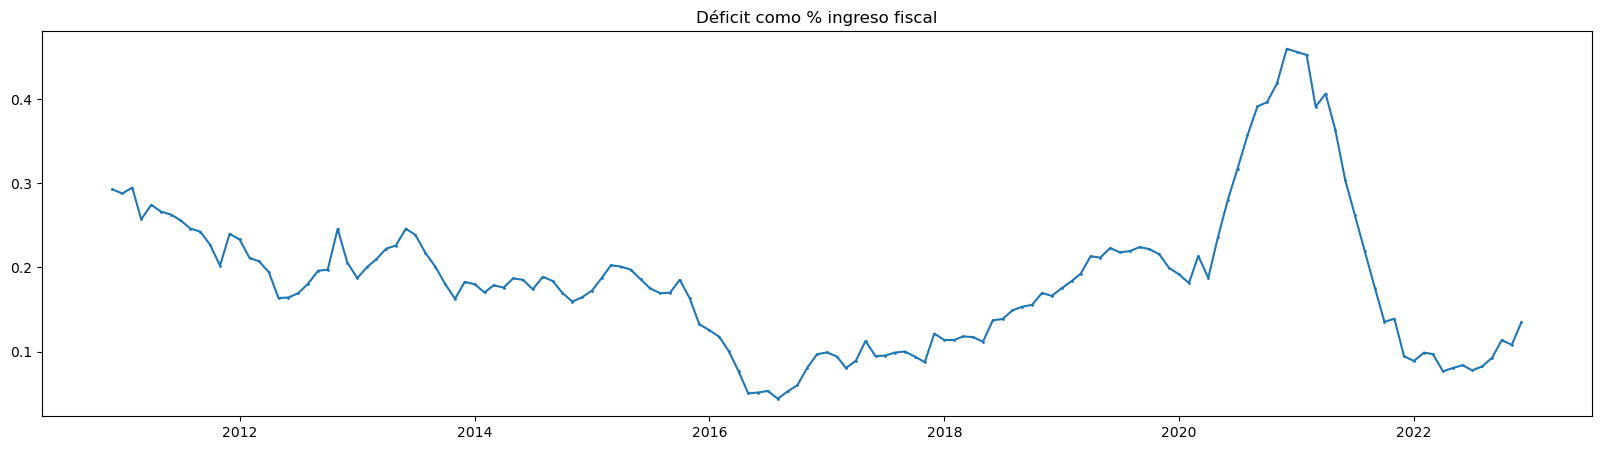

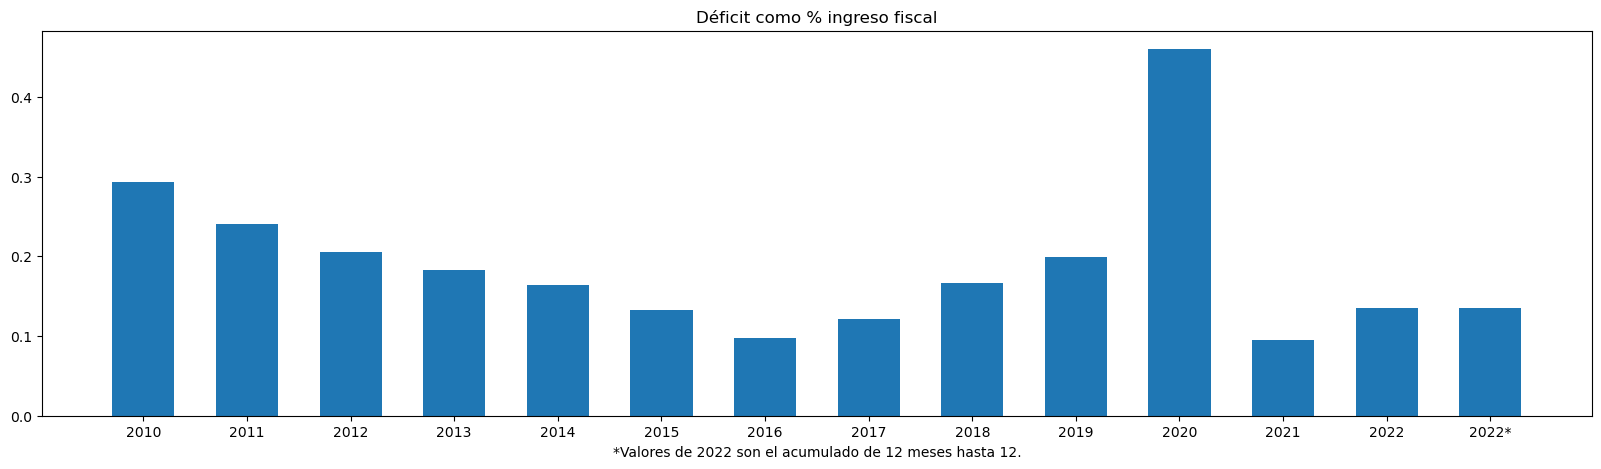

In [23]:
# Déficit como porcentaje ingreso fiscal
yearly_total_revenue = trends.get_accumulated_values(fiscal_dataframe.total_revenue, lot_size=12)

latest_month = fiscal_dataframe.iloc[-1].month.month # 
last_many_months = -12 * 12 + (12-latest_month) - 1 # 7 años con offset (ajustar a dic)


plt.figure(figsize=(20,5))
plt.plot_date(x=fiscal_dataframe.date[last_many_months:],
              y = np.abs((np.array(deficit_yearly_values[last_many_months:]) 
                    / np.array(yearly_total_revenue[last_many_months:]))
              ),
              linestyle='-',
              markersize=1)
plt.title("Déficit como % ingreso fiscal")

plt.show()

# https://stackoverflow.com/questions/1403674/
# pythonic-way-to-return-list-of-every-nth-item-in-a-larger-list
plt.figure(figsize=(20,5))
# 12-month accumulated values are used. I.e., December of each year
# Latest year uses lates value, accumulated to 12 months 

deficit_revenue_ratio = {
    'labels': list(pd.DatetimeIndex(fiscal_dataframe.date[last_many_months:][0::12]).year.astype(str)) + ["2022*"],
    'values':  list(np.abs((np.array(deficit_yearly_values[last_many_months:]) # deficit (diciembre cada año, acum. 12 meses)
        / np.array(yearly_total_revenue[last_many_months:]))[0::12])) # sobre ingreso total (diciembre cada año, acum. 12 meses)
        + [np.abs(deficit_yearly_values[-1]/yearly_total_revenue[-1])]
}

plt.bar(deficit_revenue_ratio['labels'],
        deficit_revenue_ratio['values'],
        width=0.6
        )
plt.title("Déficit como % ingreso fiscal")
plt.xlabel(f"*Valores de 2022 son el acumulado de 12 meses hasta {latest_month}.")
plt.show()

In [24]:
deficit_revenue_ratio_csv = "Deficit-Sobre-Ingreso-Fiscal.csv"
pd.DataFrame(deficit_revenue_ratio).to_csv(deficit_revenue_ratio_csv, index=False)

In [25]:
bucket_path = 'ufm-market-trends/guatemala/sector-fiscal/deficit-sobre-ingreso-fiscal'
csv_file = deficit_revenue_ratio_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Deficit-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  362.0 B/  362.0 B]                                                
Operation completed over 1 objects/362.0 B.                                      
Copying gs://ufm-market-trends/guatemala/sector-fiscal/deficit-sobre-ingreso-fiscal/Deficit-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  362.0 B/  362.0 B]                                                
Operation completed over 1 objects/362.0 B.                                      
labels,values
2010,0.2928584682160347
2011,0.24000060368664214
2012,0.2059071505359501
2013,0.18290579517159752
2014,0.16456720579012507
2015,0.13250768535737037
2016,0.09690300351303872
2017,0.12149010902180461
2018,0.16631840028765804
2019,0.19955689960580905
2020,0.4598937558001542
2021,0.09442637511819325
2022,0.13492708608627965
2022*,0.13492708608627965


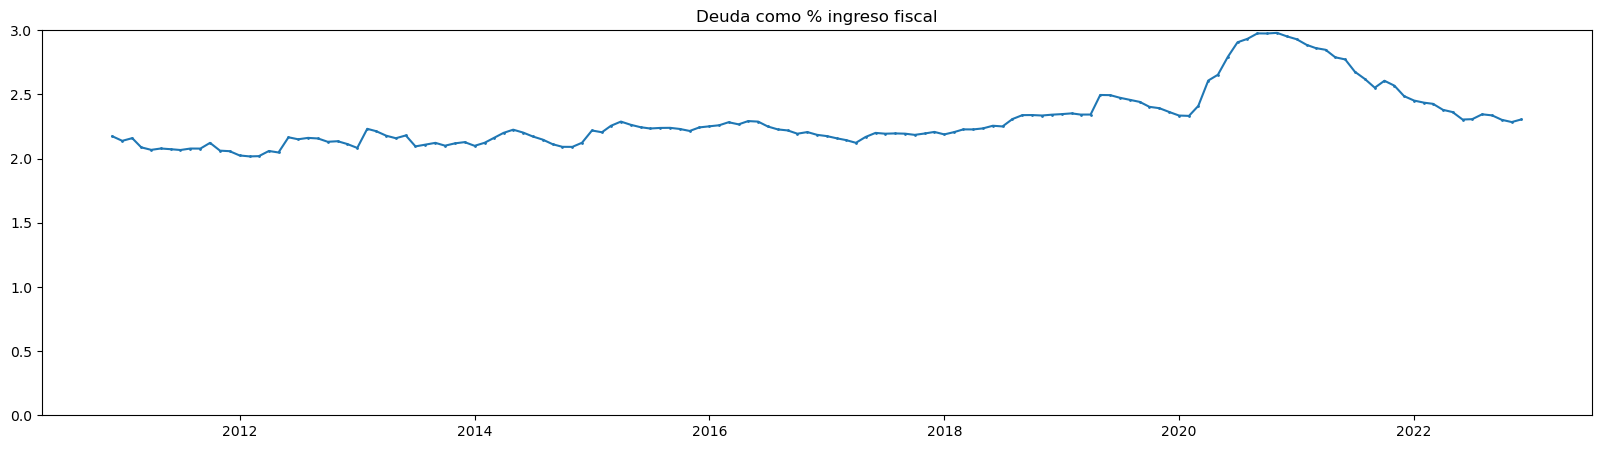

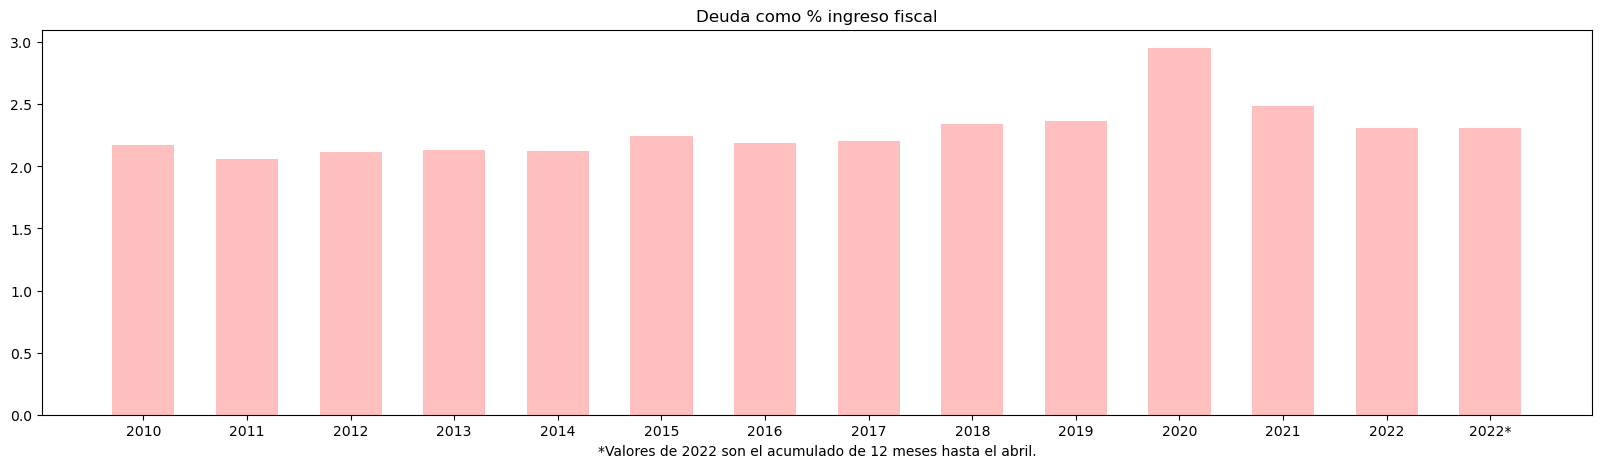

[2.17 2.06 2.11 2.13 2.12 2.24 2.19 2.21 2.34 2.36 2.95 2.49 2.31 2.31]


In [26]:
# Deuda como porcentaje ingreso fiscal
total_debt_values = list(fiscal_dataframe[TOTAL_DEBT])


latest_month = fiscal_dataframe.iloc[-1].month.month # 
last_many_months = -12 * 12 + (12-latest_month) - 1 # 12 años con offset (ajustar a dic)


plt.figure(figsize=(20,5))
plt.plot_date(x=fiscal_dataframe.date[last_many_months:],
              y = np.abs((np.array(total_debt_values[last_many_months:]) 
                    / np.array(yearly_total_revenue[last_many_months:]))
              ),
              linestyle='-',
              markersize=1)
plt.ylim(0,3)
plt.title("Deuda como % ingreso fiscal")

# plt.show()

# https://stackoverflow.com/questions/1403674/
# pythonic-way-to-return-list-of-every-nth-item-in-a-larger-list
plt.figure(figsize=(20,5))
# 12-month accumulated values are used. I.e., December of each year
# Latest year uses lates value, accumulated to 12 months 

debt_revenue_ratio = {
    'labels': list(pd.DatetimeIndex(fiscal_dataframe.date[last_many_months:][0::12]).year.astype(str)) + ["2022*"],
    'values':  list(np.abs((np.array(total_debt_values[last_many_months:]) # deficit (diciembre cada año, acum. 12 meses)
        / np.array(yearly_total_revenue[last_many_months:]))[0::12])) # sobre ingreso total (diciembre cada año, acum. 12 meses)
        + [np.abs(total_debt_values[-1]/yearly_total_revenue[-1])]
}

plt.bar(debt_revenue_ratio['labels'],
        debt_revenue_ratio['values'],
        width=0.6, color='r', alpha=0.25
        )
plt.title("Deuda como % ingreso fiscal")
plt.xlabel("*Valores de 2022 son el acumulado de 12 meses hasta el abril.")
plt.show()
print(np.round(debt_revenue_ratio['values'],2))


In [27]:
debt_revenue_ratio_csv = "Deuda-Sobre-Ingreso-Fiscal.csv"
pd.DataFrame(debt_revenue_ratio).to_csv(debt_revenue_ratio_csv, index=False)

In [28]:
bucket_path = 'ufm-market-trends/guatemala/sector-fiscal/deuda-sobre-ingreso-fiscal'
csv_file = debt_revenue_ratio_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Deuda-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  342.0 B/  342.0 B]                                                
Operation completed over 1 objects/342.0 B.                                      
Copying gs://ufm-market-trends/guatemala/sector-fiscal/deuda-sobre-ingreso-fiscal/Deuda-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  342.0 B/  342.0 B]                                                
Operation completed over 1 objects/342.0 B.                                      
labels,values
2010,2.1741259657010317
2011,2.057901334985804
2012,2.113629153914969
2013,2.128414432573298
2014,2.1236209245225988
2015,2.2431447687882673
2016,2.185379734943484
2017,2.207974578177284
2018,2.3422517030110317
2019,2.363855058501311
2020,2.9530262943536814
2021,2.486979896864651
2022,2.305585509644374
2022*,2.305585509644374
